# PRÁCTICO FINAL DE CIENCIA DE DATOS I - Coder House
Estudiante: Gonzalo Leonel Gramajo

## **ABSTRAC**
Este notebook corresponde al trabajo final del curso "Fundamentos de ciencia de datos" de Coder House. Está basado en un dataset de ventas de autos rescatado desde Keegle. Este conjunto de datos incluye todas las entradas de vehículos usados ​​dentro de los Estados Unidos en Craigslist.
Es importante resaltar que se cuenta con 426 mil lineas y el archivo ocupa 1.45 GB de almacenamiento.

**Objetivo**: Lograr predecir el precio de venta de los vehículos

**Dataset**: Used Cars Dataset - Vehicles listings from Craigslist.org. Enlace web: https://www.kaggle.com/datasets/austinreese/craigslist-carstrucks-data

**Pasos:**
1.  **Introducción y Objetivo:** Definir el problema y el objetivo.
2.  **Importar Librerías:** Cargar las herramientas necesarias.
3.  **Carga de Datos:** Leer el dataset.
4.  **Hipótesis:** Plantear una hipótesis clara.
5.  **Análisis Exploratorio de Datos (EDA):** Entender los datos, distribuciones, valores faltantes y relaciones.
6.  **Feature Engineering (Ingeniería de Características):** Crear nuevas características si es relevante.
7.  **Preprocesamiento de Datos:** Preparar los datos para el modelo (manejo de categóricas, escalado).
8.  **División de Datos:** Separar en conjuntos de entrenamiento y prueba.
9.  **Construcción y Entrenamiento del Modelo:** Usar RandomForestClassifier.
10. **Evaluación del Modelo:** Medir el rendimiento con métricas adecuadas.
11. **Análisis de Importancia de Características:** Identificar qué variables son más influyentes.
12. **Conclusiones:** Interpretar los resultados y validar/refutar la hipótesis.

______________________________________________________________________________
**DESCRIPCIÓN DE LAS COLUMNAS:**

| # | CAMPO | TIPO DE DATO | DESCRIPCIÓN |
|---|-------|--------------|-------------|
| 1 | id | number | identificador del automovil publicado en la pagina web. |
| 2 | url | string | direccion web a la publicaciion del automovil en la pagina web. |
| 3 | region | string | estado de los estado unidos donde esta publicado el automovil segun Craiglist. |
| 4 | region_url | string | url pertencceinte exclusivamente a la region. |
| 5 | price | number | precio del automovil en unidades de la moneda dolar (USD). |
| 6 | year | number | año de fabricacion del automovil. |
| 7 | manufacturer | string |fabricante del vehiculo. |
| 8 | model | string | modelo del vehiculo segun la disignacion que le dio el fabricante. |
| 9 | condicion | string | esta es una evaluacion que se hace al publicar el automovil en la pagina web, pero es un dato subjetivo acorde al publicador. |
| 10 | cylinders | string | cantidad de cilindros que tiene el motor en su estructura y como estan configurados. |
| 11 | fuel | string | combustible que utiliza el vehiculo. |
| 12 | odometer | number | es la distancia recorrida todal del vehiculo en millas. |
| 13 | title_status | string | estado del titulo del vehiculo. No se conoce especificamente que significa, se averiguara mas al respecto. |
| 14 | transmission | string | tipo de trasmision con la que esta configurado el vehiculo. |
| 15 | VIN | string | numero de identificacion del vehiculo. Es parecido a la patente. |
| 16 | drive | string | tipo de traccion del vehiculo. Esto es, como se distribuye la energia mecanica a las ruedas. |
| 17 | size | number | se invertigara mas al respecto de que significa esta columna. |
| 18 | type | string | tipo o categoria del formato del vehiculo. |
| 19 | paint_color | string | color exterior del vehiculo. |
| 20 | image_url | string | link a la imagen del vehiculo publicado. |
| 21 | description | string | descripcion del vehiculo redactada por la persona que publico el vehiculo en la pagina web. |
| 22 | country | null | columna vacia ya que el valor siempre era estados unidos. |
| 23 | state | string | estado de los estados unidos donde se publica el vehiculo. No se almacena el nombre ompleto, sino la abreviatura. |
| 24 | lat | number | latitud de la ubicacion del vehiculo listado. |
| 25 | lon | number | longitud de la ubicacion del vehiculo listado. |
| 26 | posting_date | datetime | fecha de la publicacion del vehiculo. |

______________________________________________________________________________
**HIPÓTESIS:**

1. Los vehículos con valores en el odómetro más bajo se venden exponencialmente más caros.
2. La mayor cantidad de publicaciones son de marcas estadounidenses (Chevrolet, Ford, etc.)
3. Los vehículos con año de fabricación menor, se venden exponencialmente más caros.
4. Más del 50% de las publicaciones, son de vehículos con transmisión automática.

## **PREPARACIÓN DEL DATASET**
1. Acceder al archivo CSV del dataset:

In [4]:
import pandas as pd

file_path = './vehicles.csv' # ruta al archivo CSV
df = pd.read_csv(file_path) # leer el archivo CSV y conseguir un dataframe
df.head() # mostrar los primeros 5 valores

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


2. Verificar la integridad de los datos en las columnas. Esto se hace para verificar que tan buena es la calidad del dataset. Keggle, la pagina web desde donde se descargo el datase, muestra un repote de la integridad de los datos de cada columna, pero para compemenar el analisis, se realiza con el siguiente codigo:

In [5]:
# Función para calcular el porcentaje de integridad de cada columna
def column_integrity_simple(df):
    for col in df.columns:
        total_rows = len(df)
        non_null_count = df[col].notna().sum()
        integrity_percentage = (non_null_count / total_rows) * 100
        print(f"Columna {col}: {round(integrity_percentage, 2)}% -> {total_rows - non_null_count}/{total_rows}")

# Ejecutar el análisis de integridad simple
print("Integridad de los datos por columna:")
column_integrity_simple(df)

Integridad de los datos por columna:
Columna id: 100.0% -> 0/426880
Columna url: 100.0% -> 0/426880
Columna region: 100.0% -> 0/426880
Columna region_url: 100.0% -> 0/426880
Columna price: 100.0% -> 0/426880
Columna year: 99.72% -> 1205/426880
Columna manufacturer: 95.87% -> 17646/426880
Columna model: 98.76% -> 5277/426880
Columna condition: 59.21% -> 174104/426880
Columna cylinders: 58.38% -> 177678/426880
Columna fuel: 99.29% -> 3013/426880
Columna odometer: 98.97% -> 4400/426880
Columna title_status: 98.07% -> 8242/426880
Columna transmission: 99.4% -> 2556/426880
Columna VIN: 62.27% -> 161042/426880
Columna drive: 69.41% -> 130567/426880
Columna size: 28.23% -> 306361/426880
Columna type: 78.25% -> 92858/426880
Columna paint_color: 69.5% -> 130203/426880
Columna image_url: 99.98% -> 68/426880
Columna description: 99.98% -> 70/426880
Columna county: 0.0% -> 426880/426880
Columna state: 100.0% -> 0/426880
Columna lat: 98.47% -> 6549/426880
Columna long: 98.47% -> 6549/426880
Columna

In [6]:
df.isna().sum()

id                   0
url                  0
region               0
region_url           0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
image_url           68
description         70
county          426880
state                0
lat               6549
long              6549
posting_date        68
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

In [8]:
df.describe()

,id,price,year,odometer,county,lat,long
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05,0.0,420331.000000,420331.000000
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04,NaN,38.493940,-94.748599
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05,NaN,5.841533,18.365462
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00,NaN,-84.122245,-159.827728
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04,NaN,34.601900,-111.939847
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04,NaN,39.150100,-88.432600
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05,NaN,42.398900,-80.832039
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07,NaN,82.390818,173.885502


In [9]:
# Completamos los datos faltantes en las columnas de tipo object/string
columnas_editar = ("manufacturer","model","condition",
                   "cylinders","fuel","title_status",
                   "transmission","drive", "size", "type",
                   "paint_color")
for columna in columnas_editar:
    df[columna] = df[columna].fillna("uknown")

# Completamos los datos faltantes en las columnas de tipo number
df["year"] = df["year"].fillna(df["year"].mean())
df["odometer"] = df["odometer"].fillna(df["odometer"].mean())

# Mostrar que los datos fueron modificados en el dataframe
df.isna().sum()

id                   0
url                  0
region               0
region_url           0
price                0
year                 0
manufacturer         0
model                0
condition            0
cylinders            0
fuel                 0
odometer             0
title_status         0
transmission         0
VIN             161042
drive                0
size                 0
type                 0
paint_color          0
image_url           68
description         70
county          426880
state                0
lat               6549
long              6549
posting_date        68
dtype: int64

Hay columnas que no fueron completadas porque no es necesario hacerlo por el tipo de dato que representan. Por ejemplo, VIN es la patente o un identificador unico del vehoiculo. Sin embargo, no son datos que sean relevantes para la contrastación de la hipotesis y dificilmente sean usados en futuros análisis. Como así tambien la ubicacion precisa de donde se realizo el posteo, es decir "lat" y "lon".

## **CONTRASTACIÓN DE LAS HIPÓTESIS**
#### Hipótesis 1:
- *''Los vehículos con valores en el odómetro más bajo se venden exponencialmente más caros''*

Primero, se consigue las medidas de tendencia central y otras medidas complementarias. La MODA no se calcula, ya que los precios son variados y dificilmente se repitan.

In [ ]:
# Calcular estadísticas para la columna "odometer"
odometer_stats = {
    "Media": df["odometer"].mean(),
    "Mediana": df["odometer"].median(),
    "Rango": df["odometer"].max() - df["odometer"].min(),
    "Varianza": df["odometer"].var(),
    "Desvío estándar": df["odometer"].std(),
    "Percentil 25": df["odometer"].quantile(0.25),
    "Percentil 50 (Mediana)": df["odometer"].quantile(0.50),
    "Percentil 75": df["odometer"].quantile(0.75),
    "Valor mínimo": df["odometer"].min(),
    "Valor máximo": df["odometer"].max()
}

# Imprimir los resultados
for key, value in odometer_stats.items():
    print(f"{key}: {round(value, 2)}")

Media: 98043.33
Mediana: 85548.0
Rango: 10000000.0
Varianza: 45745296383.6
Desvío estándar: 213881.5
Percentil 25: 37704.0
Percentil 50 (Mediana): 85548.0
Percentil 75: 133542.5
Valor mínimo: 0.0
Valor máximo: 10000000.0


ValueError: levels must be in [0, 1]

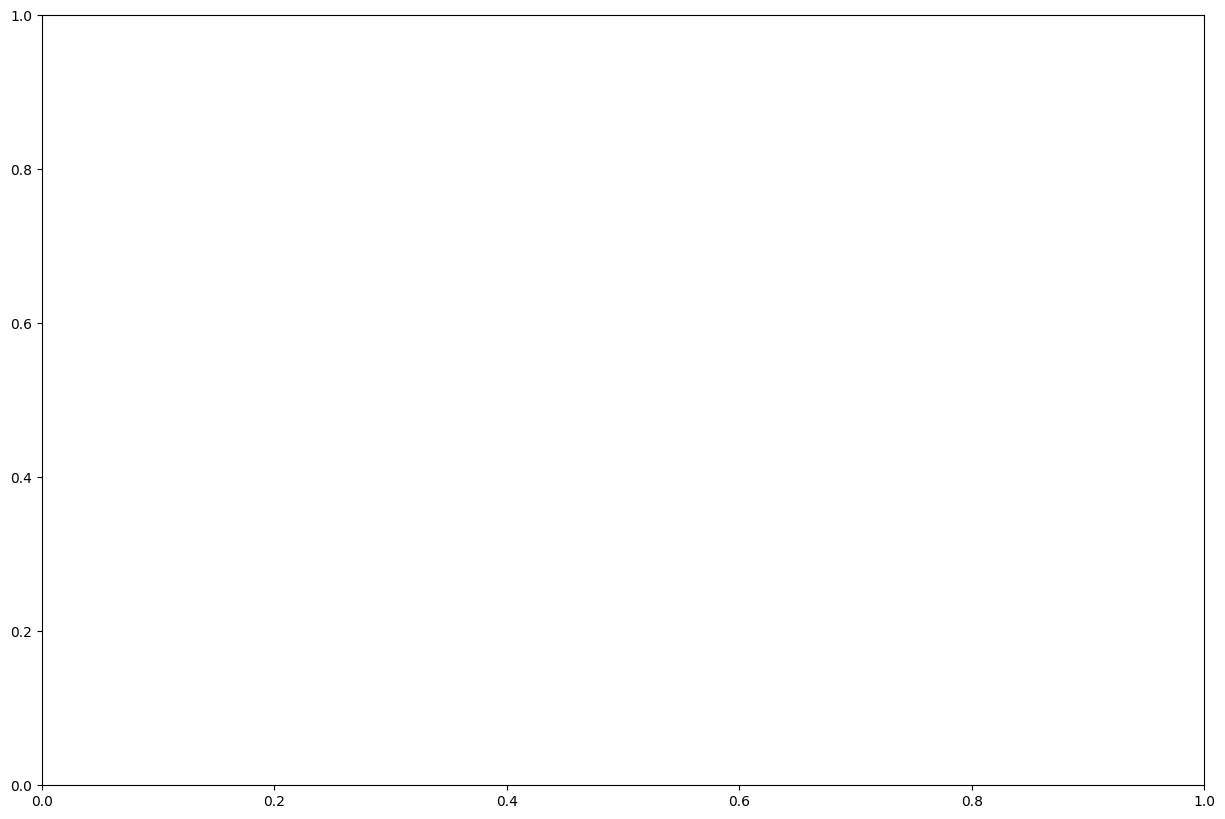

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Asegurar que las columnas sean numéricas y eliminar valores NaN
df["odometer"] = pd.to_numeric(df["odometer"], errors='coerce')
df["price"] = pd.to_numeric(df["price"], errors='coerce')

# Filtrar valores no nulos
df_clean = df.dropna(subset=["odometer", "price"])

# Crear el gráfico
plt.figure(figsize=(15, 10))
#sns.histplot(df_clean, x="odometer", y="price", bins=50, pthresh=0.1, cmap="Blues")

# using numpy.linspace to ensure they are strictly increasing:
levels = np.linspace(df_clean["price"].min(), df_clean["price"].max(), 10)  # 10 levels between min and max price
# Plot using the calculated levels:
sns.kdeplot(x=df_clean["odometer"], y=df_clean["price"], color="red", linewidth=2, levels=levels)

# Etiquetas y título
plt.title("Relación entre Odómetro y Precio de Venta")
plt.xlabel("Odómetro (millas)")
plt.ylabel("Precio (USD)")

# Mostrar el gráfico
plt.show()

In [ ]:
correlacion = df["odometer"].corr(df["price"])
print(f"La correlación entre odómetro y precio es: {round(correlacion, 2)}")

La correlación entre odómetro y precio es: 0.01
